In [1]:
# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from featexp import get_univariate_plots
plt.style.use('ggplot')
%matplotlib inline

from IPython.display import display

# remove warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

print(train_data.shape)
display(train_data.head(1))

print(test_data.shape)
display(test_data.head(1))

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500


(1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal


## 列出數字型的欄位

In [3]:
previous_num_columns = train_data.select_dtypes(exclude=['object']).columns.values.tolist()
previous_num_columns.remove('Id')
previous_num_columns.remove('SalePrice')
print(previous_num_columns)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


## 對數字型欄位一一比較訓練集、測試集之分布

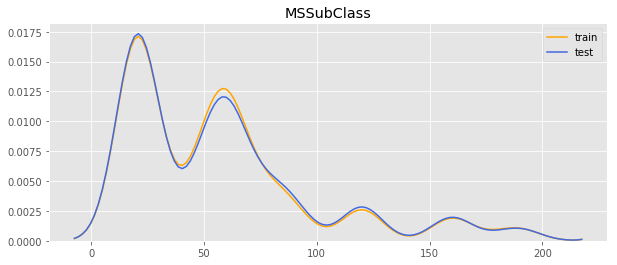

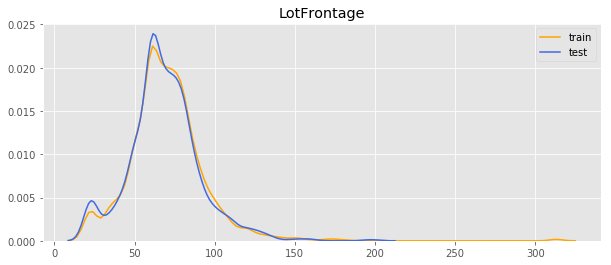

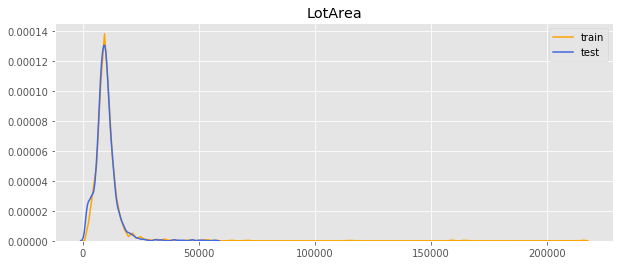

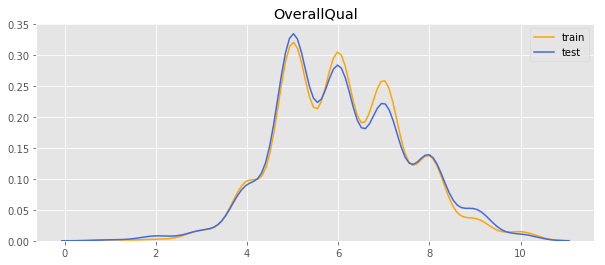

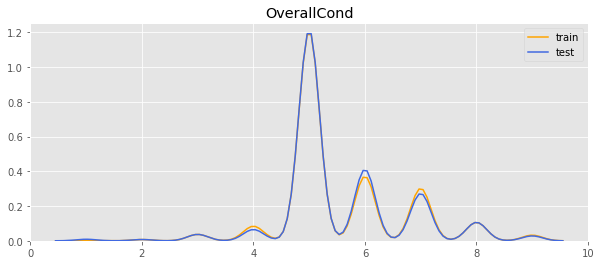

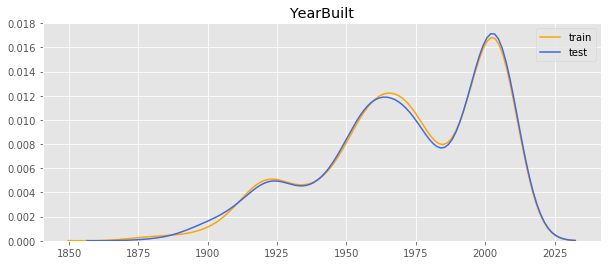

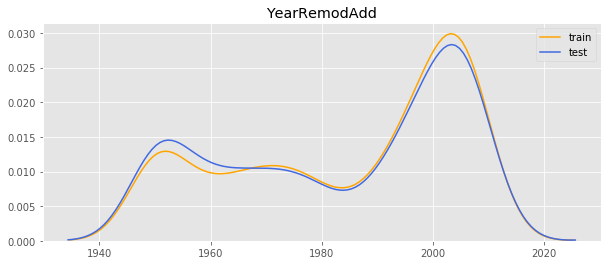

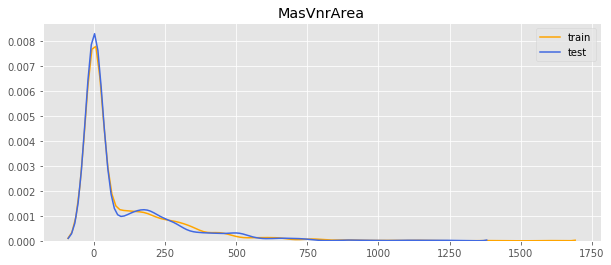

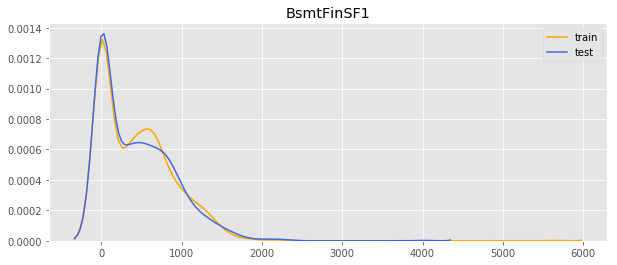

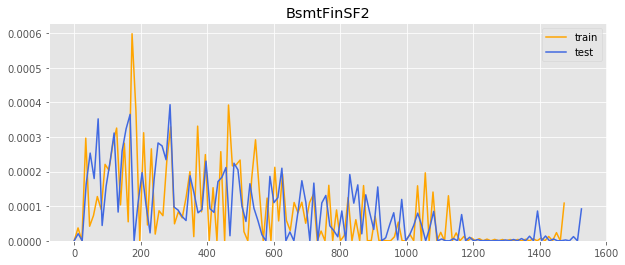

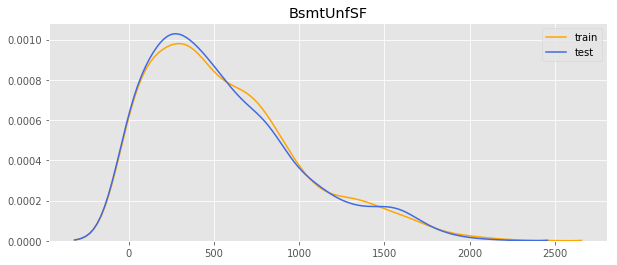

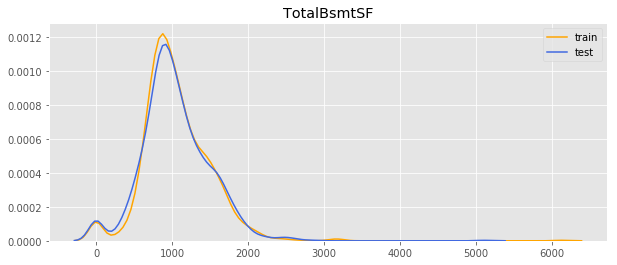

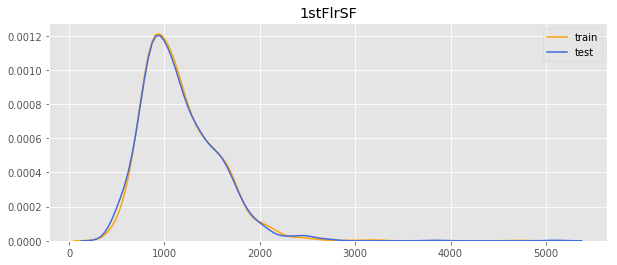

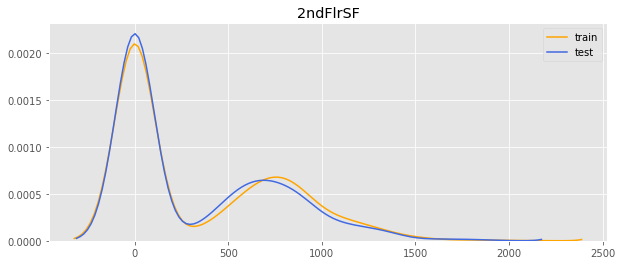

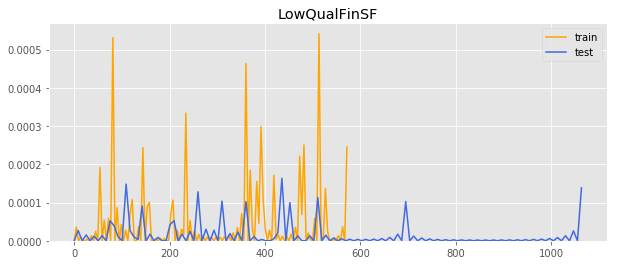

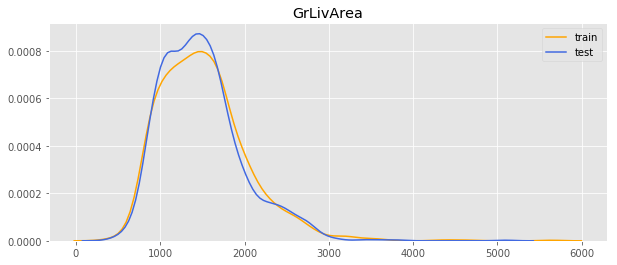

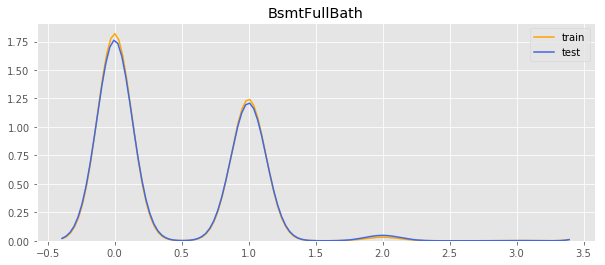

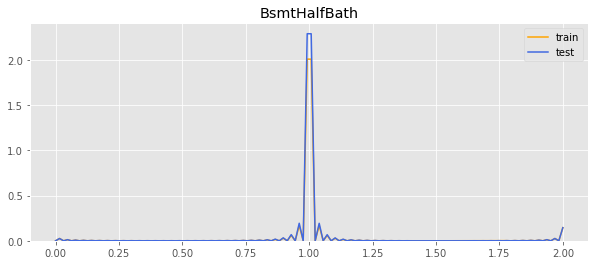

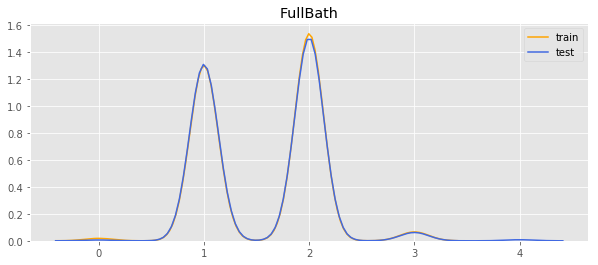

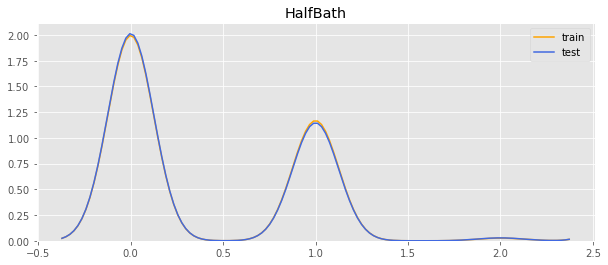

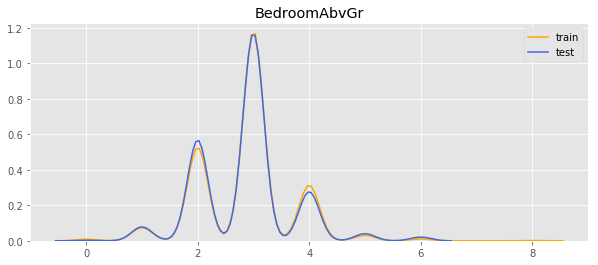

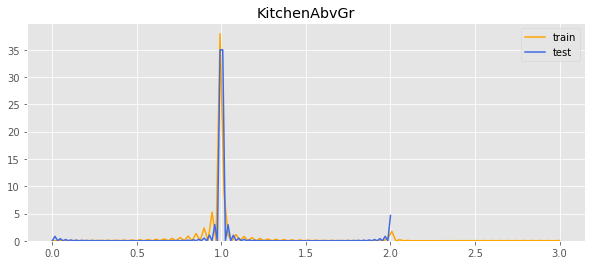

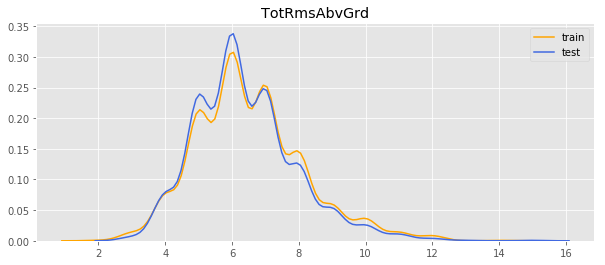

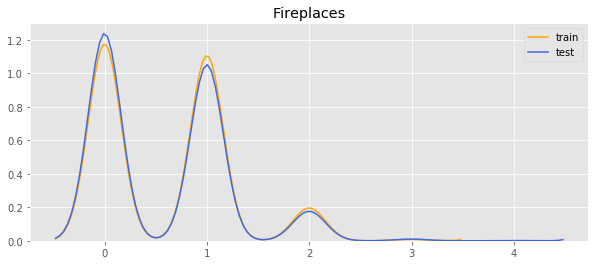

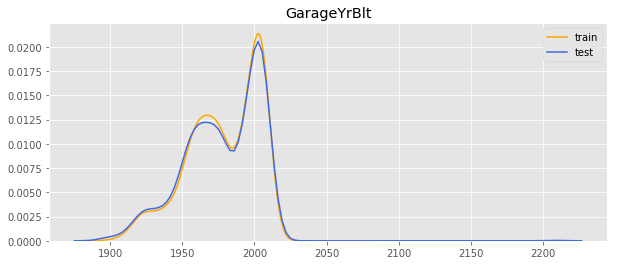

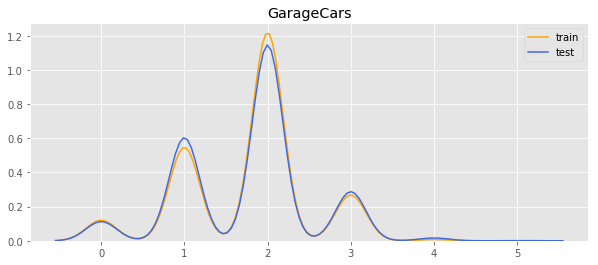

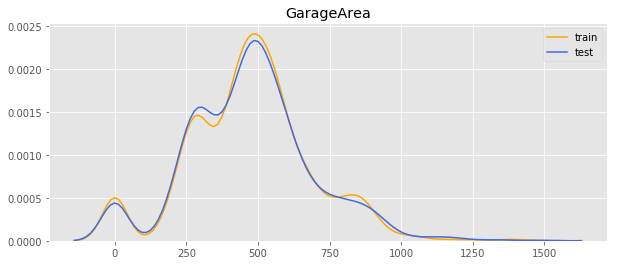

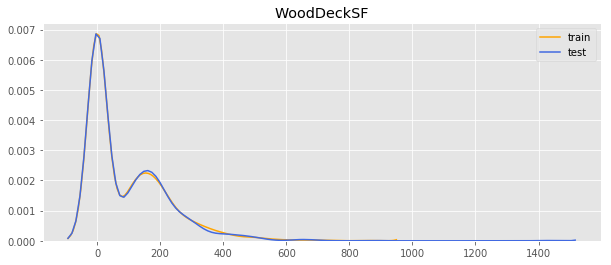

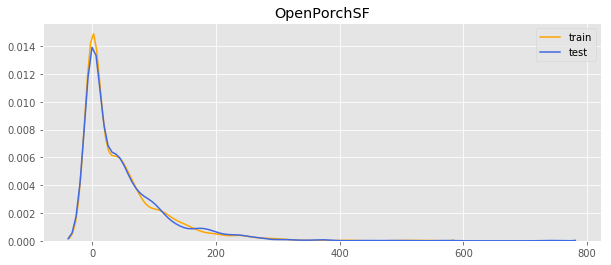

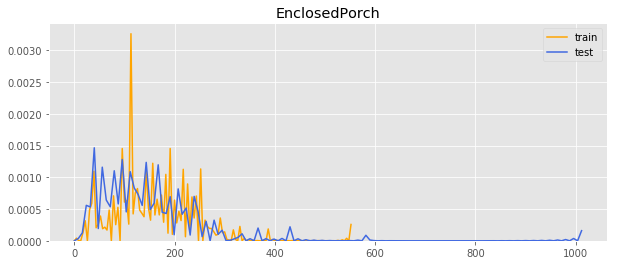

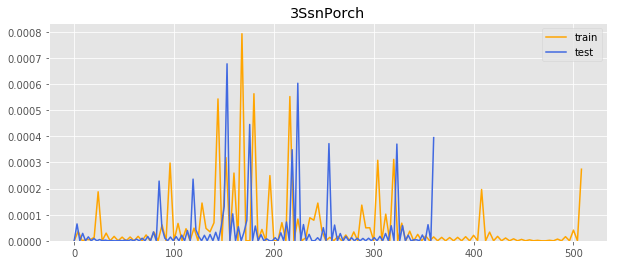

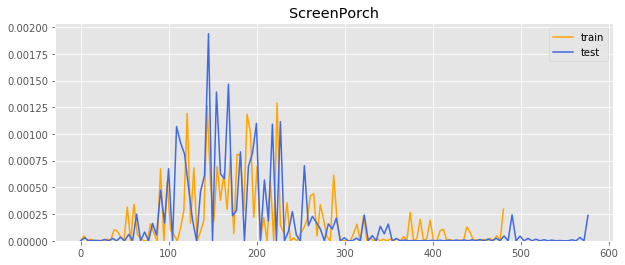

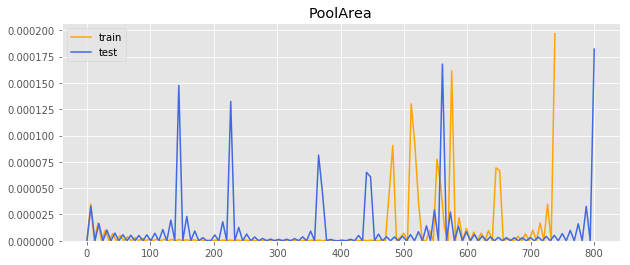

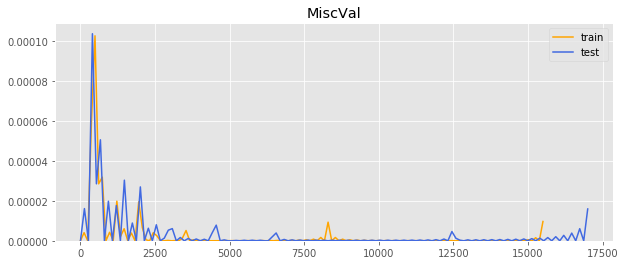

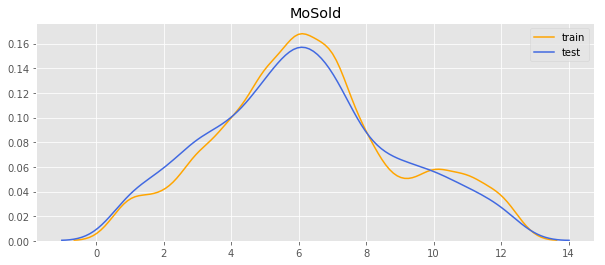

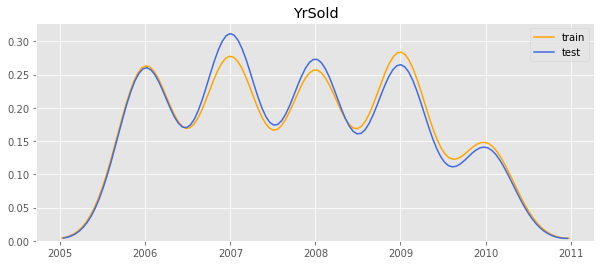

In [4]:
for col in previous_num_columns:
    fig, ax = plt.subplots(figsize=(10, 4))
    plt.title(col)
    sns.kdeplot(train_data[col], color='orange', label='train', ax=ax)
    sns.kdeplot(test_data[col], color='royalblue', label='test', ax=ax)
    plt.show()

機器學習模型要表現得好，訓練集以及測試集的數據分佈須盡量一致是最基本的要求，觀察分佈狀況後的結論為:

- LotFrontage: 訓練集當中有大於210的紀錄，但是測試集當中沒有
- LotArea   : 訓練集當中有大於70000的紀錄录，但是測試集當中沒有
- MasVnrArea : 訓練集當中有大於1500的记录，但是測試集當中沒有
- BsmtFinSF1 : 訓練集當中有大於4500的记录，但是測試集當中沒有
- TotalBsmtSF : 訓練集當中有大於5500的记录，但是測試集當中沒有

有一定數量的欄位訓練集以及測試集分佈全然不同或有噪聲，因此在訓練時應該排除這些欄位

## 對刪去資料的欄位做再一次的分佈觀察

In [5]:
print(train_data.shape)
train_data.drop(train_data[train_data["LotFrontage"] > 200].index, inplace=True)
train_data.drop(train_data[train_data["LotArea"] > 70000].index, inplace=True)
train_data.drop(train_data[train_data["MasVnrArea"] > 1500].index, inplace=True)
train_data.drop(train_data[train_data["BsmtFinSF1"] > 4500].index, inplace=True)
train_data.drop(train_data[train_data["TotalBsmtSF"] > 5500].index, inplace=True)
print(train_data.shape)


train_length = train_data.shape[0]

(1460, 81)
(1452, 81)


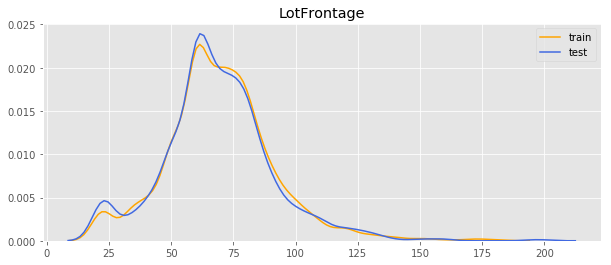

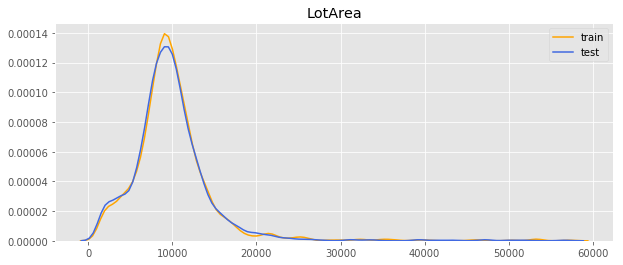

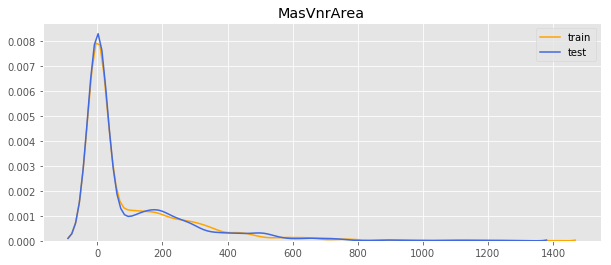

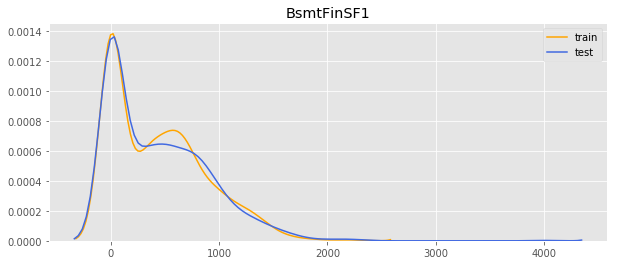

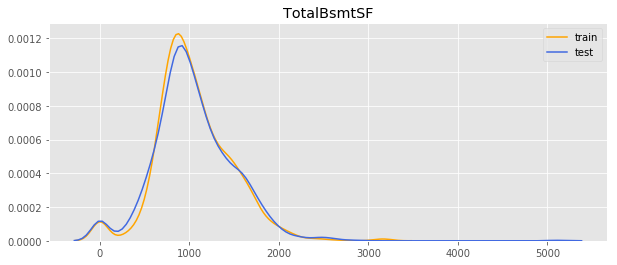

In [6]:
for col in ["LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "TotalBsmtSF"]:
    fig, ax = plt.subplots(figsize=(10, 4))
    plt.title(col)
    sns.kdeplot(train_data[col], color='orange', label='train', ax=ax)
    sns.kdeplot(test_data[col], color='royalblue', label='test', ax=ax)
    plt.show()

### 將訓練、資料集合併，方便同時觀察以及預處理

In [7]:
print('train.shape: ',train_data.shape)
print('test.shape: ',test_data.shape)
print(train_data.columns)
alldata = pd.concat((train_data.loc[:,'MSSubClass':'SaleCondition'],
                     test_data.loc[:,'MSSubClass':'SaleCondition']))
alldata = alldata.reset_index(drop=True)

train.shape:  (1452, 81)
test.shape:  (1459, 80)
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea

## 填補缺失值

In [8]:
has_null_columns = alldata.columns[alldata.isnull().any()].tolist()
train_null = train_data[has_null_columns].isnull().sum()
test_null = test_data[has_null_columns].isnull().sum()
conbined_null = alldata[has_null_columns].isnull().sum()

print('how many data missed each column of train/test/conbine datas')
missed_data = pd.DataFrame(data=[train_null, test_null, conbined_null],
                             index=['train', 'test', 'conbine'], 
                             columns=has_null_columns)
missed_data

how many data missed each column of train/test/conbine datas


,MSZoning,LotFrontage,Alley,Utilities,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,...,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,SaleType
train,0,256,1362,0,0,0,8,8,37,37,...,81,81,0,0,81,81,1446,1171,1400,0
test,4,227,1352,2,1,1,16,15,44,45,...,78,78,1,1,78,78,1456,1169,1408,1
conbine,4,483,2714,2,1,1,24,23,81,82,...,159,159,1,1,159,159,2902,2340,2808,1


In [9]:
def fill_missing_conbined_data(column, value):
    global alldata
    alldata.loc[alldata[column].isnull(),column] = value

** LotFrontage/LotArea **

缺失的LotFrontage一般來說常用均值填補，但考慮到可能與Neighborhood有關連，採用以Neighborhood為條件的方式補值。

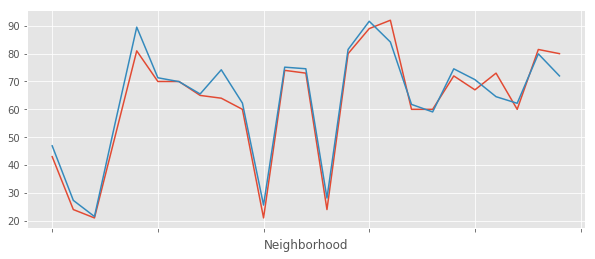

In [10]:
alldata['LotFrontage'].groupby(alldata["Neighborhood"]).median().plot(figsize=(10, 4))
alldata['LotFrontage'].groupby(alldata["Neighborhood"]).mean().plot(figsize=(10, 4))

In [11]:
lf_neighbor_map = alldata['LotFrontage'].groupby(alldata["Neighborhood"]).median()
    
rows = alldata['LotFrontage'].isnull()
alldata['LotFrontage'][rows] = alldata['Neighborhood'][rows].map(lambda neighbor : lf_neighbor_map[neighbor])

In [12]:
alldata[alldata['LotFrontage'].isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition


** Alley **

In [13]:
fill_missing_conbined_data('Alley', 'NA')

** MasVnrType / MasVnrArea **

In [14]:
alldata['MasVnrType'].fillna('None', inplace=True)
alldata['MasVnrArea'].fillna(0, inplace=True)

** BsmtQual / BsmtCond / BsmtExposure / BsmtFinType1 / BsmtFinType2 **

In [15]:
basement_cols=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtFinSF1','BsmtFinSF2']

In [16]:
for column in basement_cols:
    if 'FinSF'not in column:
        # NA No Basement
        fill_missing_conbined_data(column, 'NA')

In [17]:
fill_missing_conbined_data('BsmtFinSF1', 0)
fill_missing_conbined_data('BsmtFinSF2', 0)

** Electrical **

以眾數做為填充

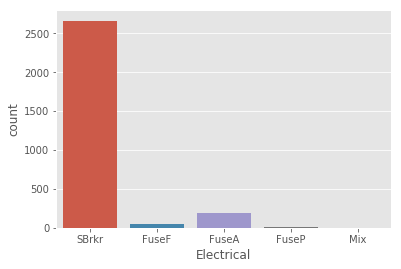

In [18]:
sns.countplot(alldata['Electrical'])

In [19]:
fill_missing_conbined_data('Electrical', 'SBrkr')

** FireplaceQu **
FireplaceQu的缺值是跟Fireplaces相關的，沒有Fireplaces的紀錄FireplaceQu就會是NA

In [20]:
alldata[alldata.FireplaceQu.isnull()][['FireplaceQu', 'Fireplaces']].head()

,FireplaceQu,Fireplaces
0,NaN,0
5,NaN,0
10,NaN,0
12,NaN,0
15,NaN,0


In [21]:
#將缺值填入NA 表示沒有火爐
fill_missing_conbined_data('FireplaceQu', 'NA')

** POOLQC **
同樣道理POOLQC的缺值是因為沒有游泳池的關係

In [22]:
fill_missing_conbined_data('PoolQC', 'NA')

** MiscFeature **

In [23]:
fill_missing_conbined_data('MiscFeature', 'NA')

** Fence **

In [24]:
fill_missing_conbined_data('Fence', 'NA')

** Garages **

In [25]:
garage_cols=['GarageType','GarageQual','GarageCond','GarageYrBlt','GarageFinish','GarageCars','GarageArea']
alldata[garage_cols][alldata['GarageType'].isnull()==True].head(1)

,GarageType,GarageQual,GarageCond,GarageYrBlt,GarageFinish,GarageCars,GarageArea
39,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [26]:
# 对于缺失的字符串类型的数据填充为 NA，表示 No Garage
for column in garage_cols:
    if column != 'GarageCars' and column != 'GarageArea':
        # NA	No Basement
        fill_missing_conbined_data(column, 'NA')
    else:
        fill_missing_conbined_data(column, 0)

** MSZoning **

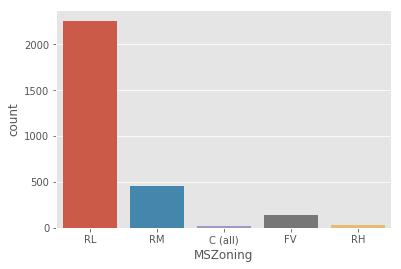

In [27]:
sns.countplot(alldata['MSZoning'])

In [28]:
fill_missing_conbined_data('MSZoning', 'RL')

** Utilities **
test中欄位僅有單一個值，是一常數，因此是沒有作用的，應該捨棄該欄位

In [29]:
print(train_data.Utilities.value_counts())
print(test_data.Utilities.value_counts())

AllPub    1451
NoSeWa       1
Name: Utilities, dtype: int64
AllPub    1457
Name: Utilities, dtype: int64


In [30]:
alldata = alldata.drop(['Utilities'], axis=1)

** Exterior1st / Exterior2nd**

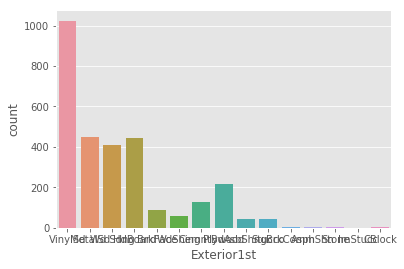

In [31]:
sns.countplot(alldata['Exterior1st'])

In [32]:
fill_missing_conbined_data('Exterior1st', 'VinylSd')

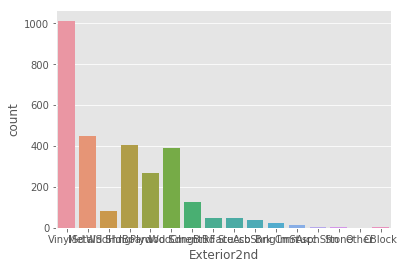

In [33]:
sns.countplot(alldata['Exterior2nd'])

In [34]:
fill_missing_conbined_data('Exterior2nd', 'VinylSd')

** BsmtUnfSF / TotalBsmtSF **

In [35]:
fill_missing_conbined_data('BsmtUnfSF', 0)
fill_missing_conbined_data('TotalBsmtSF', 0)

In [36]:
fill_missing_conbined_data('BsmtFullBath', 0)
fill_missing_conbined_data('BsmtHalfBath', 0)

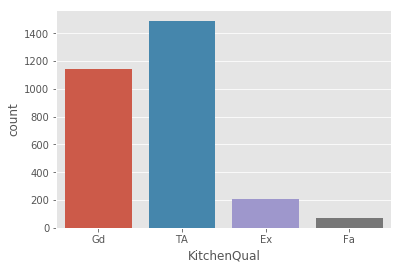

In [37]:
sns.countplot(alldata['KitchenQual'])

In [38]:
fill_missing_conbined_data('KitchenQual', 'TA')

** SaleType / Functional **

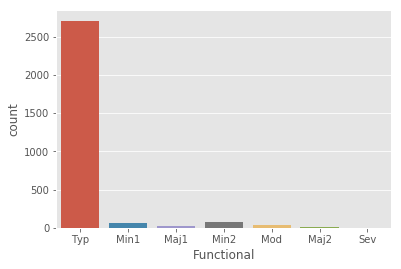

In [39]:
sns.countplot(alldata['Functional'])

In [40]:
fill_missing_conbined_data('SaleType', 'WD')
fill_missing_conbined_data('Functional', 'Typ')

In [41]:
# 存在缺失的紀錄
has_null_columns = alldata.columns[alldata.isnull().any()].tolist()
# 計算缺失值
alldata[has_null_columns].isnull().sum()

Series([], dtype: float64)

In [42]:
ordinal_cols = alldata.select_dtypes(include=['object']).columns.values.tolist()
for col in ordinal_cols:
    if 'NA' in pd.unique(alldata[col]):
        print(col)

Alley
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature


In [43]:
built_year_data = alldata[['YearBuilt', 'GarageYrBlt']][alldata['GarageYrBlt'] != 'NA']

In [44]:
built_year_data['GarageYrBlt'] = built_year_data['GarageYrBlt'].map(lambda g : int(g))
built_year_data['GarageYrBlt'].corr(built_year_data['YearBuilt'])

0.8346885266143999

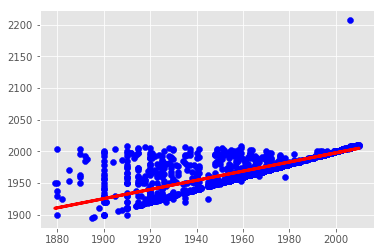

In [45]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()
garage_year = built_year_data.loc[:,'GarageYrBlt'].values
built_year = built_year_data.loc[:,'YearBuilt'].values

length = garage_year.shape[0]
garage_year = garage_year.reshape(length, 1)
built_year = built_year.reshape(length, 1)

# Train the model using the training sets
regr.fit(built_year, garage_year)
plt.scatter(built_year, garage_year,  color='blue')
plt.plot(built_year, regr.predict(built_year), color='red',
         linewidth=3)

In [46]:
alldata['GarageYrBlt'] = alldata.apply(lambda row : int(regr.predict(np.array([row['YearBuilt']]).reshape((-1, 1))))
                          if row['GarageYrBlt'] == 'NA' else int(row['GarageYrBlt']),
                           axis=1)

In [47]:
# 整修到目前的年份
alldata['RemodYears'] = alldata['YearRemodAdd'] - alldata['YearBuilt']
# 是否有整修過?
alldata["HasRemodeled"] = (alldata["YearRemodAdd"] != alldata["YearBuilt"]) * 1
# 賣出的前一年是否整修過
alldata["HasRecentRemodel"] = (alldata["YearRemodAdd"] == alldata["YrSold"]) * 1

In [48]:
alldata['GarageBltYears'] = alldata['GarageYrBlt'] - alldata['YearBuilt']

In [49]:
# 整修 / 建造 到目前有多久
alldata['HouseAge'] = alldata['YrSold'] - alldata['YearBuilt']
alldata['RemodAddAge'] = alldata['YrSold'] - alldata['YearRemodAdd']
alldata['GarageYrBltAge'] = alldata['YrSold'] - alldata['GarageYrBlt']

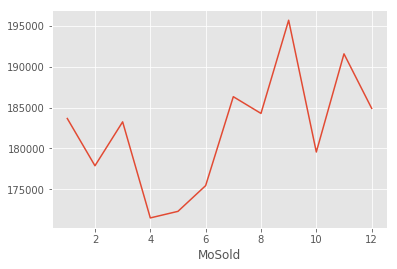

In [50]:
train_data['SalePrice'].groupby(train_data['MoSold']).mean().plot()

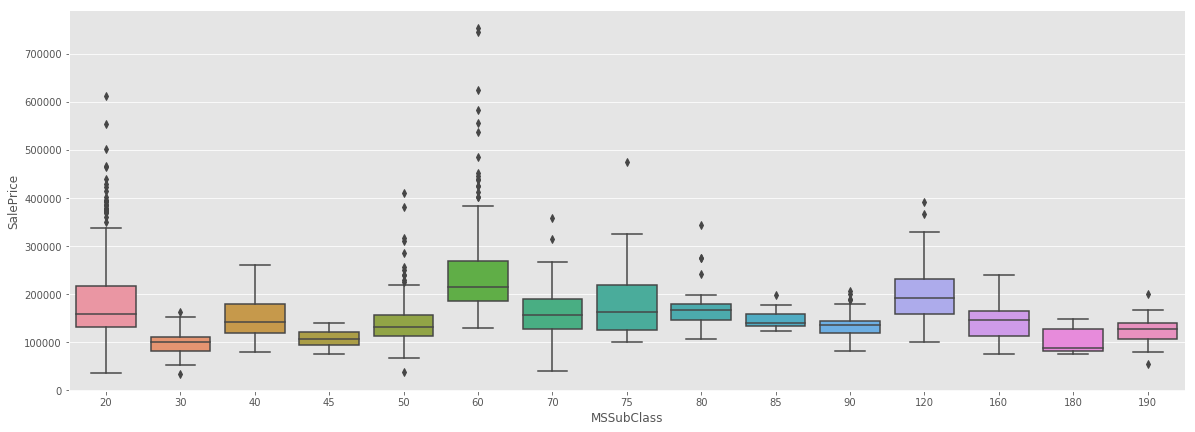

In [51]:
fig, ax = plt.subplots(figsize=(20, 7), ncols=1)
sns.boxplot(x="MSSubClass", y="SalePrice", data=train_data, ax=ax)
plt.close(2)
plt.show()

In [52]:
sale_price_mssc = train_data['SalePrice'].groupby(train_data['MSSubClass']).mean().to_dict()

In [53]:
sale_price_month = train_data['SalePrice'].groupby(train_data['MoSold']).mean().to_dict()
alldata["MonthSaledMeanPrice"] = alldata["MoSold"].replace(sale_price_month)

In [54]:
num_sales_by_month = alldata['MoSold'].value_counts().to_dict()
alldata["MonthSaledCount"] = alldata["MoSold"].replace(num_sales_by_month)

In [55]:
# 新增每種類別尺度的平均價格
sale_price_mssc = train_data['SalePrice'].groupby(train_data['MSSubClass']).mean().to_dict()
# 該月份賣的平均價格
alldata["MSSubClassMeanPrice"] = alldata["MSSubClass"].replace(sale_price_mssc)

In [56]:
alldata["NewerDwelling"] = alldata["MSSubClass"].replace(
    {20: 1, 30: 0, 40: 0, 45: 0,50: 0, 60: 1, 70: 0, 75: 0, 80: 0, 85: 0,
     90: 0, 120: 1, 150: 0, 160: 0, 180: 0, 190: 0})

In [57]:
#將看似名義尺度資料轉為次序尺度
good_level_map = {'Street': {'Grvl': 0, 'Pave': 1},
     'Alley': {'NA':0, 'Grvl': 1, 'Pave': 2},
     'ExterQual': {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1,'Po': 0},
     'ExterCond': {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1,'Po': 0},
     'BsmtExposure': {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1,'NA': 0},
     'BsmtQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2,'Po': 1,'NA': 0},
     'BsmtCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2,'Po': 1,'NA': 0},
     'BsmtFinType1': {'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6},
     'BsmtFinType2': {'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6},
     'HeatingQC': {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1,'Po': 0},
     'CentralAir': {'N':0, 'Y':1},
     'KitchenQual': {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0},
     'Functional': {'Typ':0,'Min1':1,'Min2':1,'Mod':2,'Maj1':3,'Maj2':4,'Sev':5,'Sal': 6},
     'FireplaceQu': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
     'GarageQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
     'GarageCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
     'PoolQC': {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'NA': 0},
     'Fence': {'GdPrv': 2, 'GdWo': 2, 'MnPrv': 1, 'MnWw': 1, 'NA': 0}
    }


good_level_data = alldata[list(good_level_map.keys())].replace(good_level_map)

good_level_data.columns = good_level_data.columns.map(lambda m : m + '_')

alldata[good_level_data.columns] = good_level_data[good_level_data.columns]
print(alldata.shape)

(2911, 107)


In [58]:
# Bin by neighborhood (a little arbitrarily). Values were computed by: 
neighbor_price_map = train_data["SalePrice"].groupby(train_data["Neighborhood"]).median().sort_values().to_dict()

neighbor_bin_map = {
    "MeadowV" : 0,  #  88000
    "IDOTRR" : 1,   # 103000
    "BrDale" : 1,   # 106000
    "OldTown" : 1,  # 119000
    "Edwards" : 1,  # 119500
    "BrkSide" : 1,  # 124300
    "Sawyer" : 1,   # 135000
    "Blueste" : 1,  # 137500
    "SWISU" : 2,    # 139500
    "NAmes" : 2,    # 140000
    "NPkVill" : 2,  # 146000
    "Mitchel" : 2,  # 153500
    "SawyerW" : 2,  # 179900
    "Gilbert" : 2,  # 181000
    "NWAmes" : 2,   # 182900
    "Blmngtn" : 2,  # 191000
    "CollgCr" : 2,  # 197200
    "ClearCr" : 3,  # 200250
    "Crawfor" : 3,  # 200624
    "Veenker" : 3,  # 218000
    "Somerst" : 3,  # 225500
    "Timber" : 3,   # 228475
    "StoneBr" : 4,  # 278000
    "NoRidge" : 4,  # 290000
    "NridgHt" : 4,  # 315000
}

alldata["NeighborPrice"] = alldata["Neighborhood"].map(neighbor_price_map)
alldata["NeighborBin"] = alldata["Neighborhood"].map(neighbor_bin_map)

## Feature combination

In [59]:
#分開定性與定量的欄位
str_columns = alldata.select_dtypes(include=['object']).columns.values
num_columns = alldata.select_dtypes(exclude=['object']).columns.values

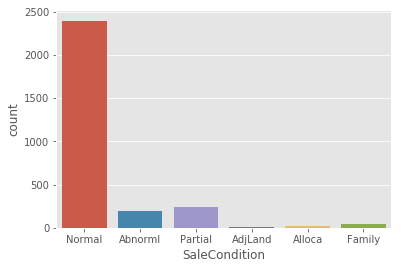

In [60]:
SaleCondition = alldata['SaleCondition'].value_counts()
sns.countplot(alldata['SaleCondition'])

In [61]:
# 增加房屋主體屬性的二元特徵
alldata["IsRegularLotShape"] = (alldata["LotShape"] == "Reg") * 1


alldata["IsLandContourLvl"] = (alldata["LandContour"] == "Lvl") * 1
alldata["IsLotConfigInside"] = (alldata["LotConfig"] == "Inside") * 1
alldata["IsLandSlopeGentle"] = (alldata["LandSlope"] == "Gtl") * 1
alldata["IsCondition1Norm"] = (alldata["Condition1"] == "Norm") * 1
alldata["IsCondition2Norm"] = (alldata["Condition2"] == "Norm") * 1
alldata["IsBldgType1Fam"] = (alldata["BldgType"] == "1Fam") * 1
alldata["IsRoofStyleGable"] = (alldata["RoofStyle"] == "Gable") * 1
alldata["IsRoofMatlCompShg"] = (alldata["RoofMatl"] == "CompShg") * 1
alldata["IsGasAHeating"] = (alldata["Heating"] == "GasA") * 1
alldata["IsGarageFinished"] = (alldata["GarageFinish"] == "Fin") * 1
alldata["IsPavedDrive"] = (alldata["PavedDrive"] == "Y") * 1
alldata["IsSaleTypeWD"] = (alldata["SaleType"] == "WD") * 1
alldata["IsSaleConditionNormal"] = (alldata["SaleCondition"] == "Normal") * 1

alldata["HasShed"] = (alldata["MiscFeature"] == "Shed") * 1.  


alldata["IsVeryNewHouse"] = (alldata["YearBuilt"] == alldata["YrSold"]) * 1

alldata["Has2ndFloor"] = (alldata["2ndFlrSF"] == 0) * 1
alldata["HasMasVnr"] = (alldata["MasVnrArea"] == 0) * 1
alldata["HasWoodDeck"] = (alldata["WoodDeckSF"] == 0) * 1
alldata["HasOpenPorch"] = (alldata["OpenPorchSF"] == 0) * 1
alldata["HasEnclosedPorch"] = (alldata["EnclosedPorch"] == 0) * 1
alldata["Has3SsnPorch"] = (alldata["3SsnPorch"] == 0) * 1
alldata["HasScreenPorch"] = (alldata["ScreenPorch"] == 0) * 1

In [62]:
# 簡化目前的欄位
alldata["SimplOverallQual"] = alldata.OverallQual.replace(
                                                        {1 : 1, 2 : 1, 3 : 1, # bad
                                                         4 : 2, 5 : 2, 6 : 2, # average
                                                         7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                        })
alldata["SimplOverallCond"] = alldata.OverallCond.replace(
                                                        {1 : 1, 2 : 1, 3 : 1, # bad
                                                         4 : 2, 5 : 2, 6 : 2, # average
                                                         7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                         })

In [63]:
# 3.Combinations of existing features

# Overall quality of the house
alldata["OverallGrade"] = alldata["OverallQual"] * alldata["OverallCond"]
# Overall quality of the garage
alldata["GarageGrade"] = alldata["GarageQual_"] * alldata["GarageCond"]
# Overall quality of the exterior
alldata["ExterGrade"] = alldata["ExterQual_"] * alldata["ExterCond"]
# # Overall kitchen score
alldata["KitchenScore"] = alldata["KitchenAbvGr"] * alldata["KitchenQual_"]
# # Overall fireplace score
alldata["FireplaceScore"] = alldata["Fireplaces"] * alldata["FireplaceQu_"]
# Overall garage score
alldata["GarageScore"] = alldata["GarageArea"] * alldata["GarageQual_"]
# Overall pool score
alldata["PoolScore"] = alldata["PoolArea"] * alldata["PoolQC_"]

# Total number of bathrooms
alldata["TotalBath"] = alldata["BsmtFullBath"] + (0.5 * alldata["BsmtHalfBath"]) + \
alldata["FullBath"] + (0.5 * alldata["HalfBath"])

# Total yard area in square feet
alldata["TotalPorchSF"] = alldata["OpenPorchSF"] + alldata["EnclosedPorch"] +\
                                alldata["3SsnPorch"] + alldata["ScreenPorch"]
# Total SF for house (living, basement, porch, pool)
alldata["AllSF"] = alldata["GrLivArea"] + alldata["TotalBsmtSF"] + \
                         alldata["TotalPorchSF"] + alldata["WoodDeckSF"] + \
                         alldata["PoolArea"]

# House completed before sale or not
alldata["BoughtOffPlan"] = alldata.SaleCondition.replace({"Abnorml" : 0, "Alloca" : 0, "AdjLand" : 0, "Family" : 0, "Normal" : 0, "Partial" : 1})

In [64]:
# 4.Polynomials on the top n existing features
train_data_new = alldata.iloc[:len(train_data),:]
train_data_new.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,GarageGrade,ExterGrade,KitchenScore,FireplaceScore,GarageScore,PoolScore,TotalBath,TotalPorchSF,AllSF,BoughtOffPlan
0,60,RL,65.0,8450,Pave,NA,Reg,Lvl,Inside,Gtl,...,TATATA,TATATA,3,0,1644.0,0,3.5,61,2627.0,0
1,20,RL,80.0,9600,Pave,NA,Reg,Lvl,FR2,Gtl,...,TATATA,TATA,2,3,1380.0,0,2.5,0,2822.0,0
2,60,RL,68.0,11250,Pave,NA,IR1,Lvl,Inside,Gtl,...,TATATA,TATATA,3,3,1824.0,0,3.5,42,2748.0,0
3,70,RL,60.0,9550,Pave,NA,IR1,Lvl,Corner,Gtl,...,TATATA,TATA,3,4,1926.0,0,2.0,307,2780.0,0
4,60,RL,84.0,14260,Pave,NA,IR1,Lvl,FR2,Gtl,...,TATATA,TATATA,3,3,2508.0,0,3.5,84,3619.0,0


Text(0, 0.5, 'Feature Importance Score')

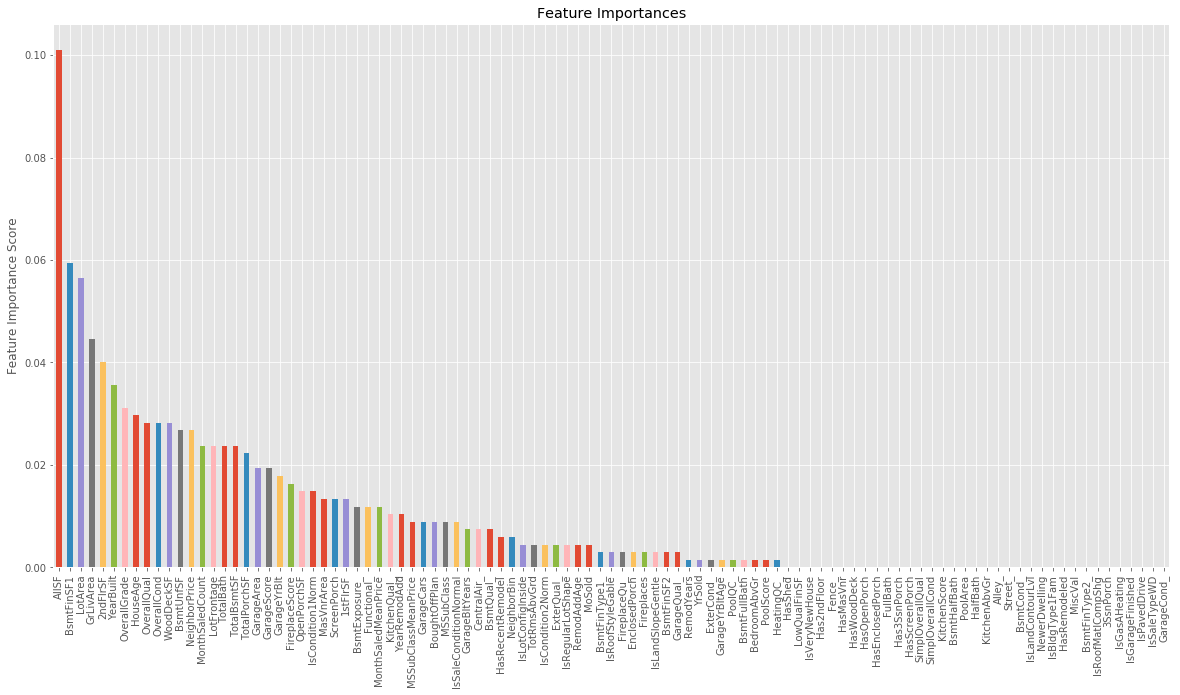

In [65]:
from xgboost import XGBRegressor

train_Y = train_data['SalePrice']
train_X = train_data_new.select_dtypes(exclude=['object'])

xgb_regressor = XGBRegressor(seed=10)
xgb_regressor.fit(train_X, train_Y)

feature_importances = pd.Series(xgb_regressor.feature_importances_, train_X.columns.values)
feature_importances = feature_importances.sort_values(ascending=False)
# feature_importances= feature_importances.head(40)
feature_importances.plot(kind='bar', title='Feature Importances', figsize=(20, 10))
plt.ylabel('Feature Importance Score')

In [66]:
top_n = 15
poly_columns = feature_importances.index.values[:top_n]
for column in poly_columns:
    alldata[column+'-s2'] = alldata[column] ** 2
    alldata[column+'-s3'] = alldata[column] ** 3
    alldata[column+'-sq'] = np.sqrt(alldata[column])

In [67]:
str_columns = alldata.select_dtypes(include=['object']).columns.values
num_columns = alldata.select_dtypes(exclude=['object']).columns.values[1:]

** 觀察skew的欄位 **

In [68]:
from scipy.stats import skew

In [69]:
scater_skew_num_columns = num_columns.tolist()
print(len(scater_skew_num_columns))
for column in num_columns:
    #排除二元的欄位
    if set(alldata[column]) == {0, 1}:
        scater_skew_num_columns.remove(column)

print(len(scater_skew_num_columns))

145
116


In [70]:
t = alldata[scater_skew_num_columns].quantile(.95)
use_max_scater = t[t == 0].index
use_95_scater = t[t != 0].index
alldata[use_max_scater] = alldata[use_max_scater] / alldata[use_max_scater].max()
alldata[use_95_scater] = alldata[use_95_scater] / alldata[use_95_scater].quantile(.95)

In [71]:
skewed = alldata[scater_skew_num_columns].apply(lambda x: skew(x.astype(float)))
skewed = skewed[skewed > 0.75]
skewed = skewed.index
skewed = skewed.drop(['NeighborPrice','NeighborPrice-s2','NeighborPrice-s3'])
print('skewed features', skewed.shape[0],' from total ',alldata.shape[1],' features')
alldata[skewed] = np.log1p(alldata[skewed])

skewed features 59  from total  190  features


In [72]:
price_feature = ["MonthSaledMeanPrice","MSSubClassMeanPrice","NeighborPrice","NeighborPrice-s2","NeighborPrice-s3","NeighborPrice-sq"]
alldata[price_feature] = np.log1p(alldata[price_feature])

In [73]:
dummies_data = pd.get_dummies(alldata[str_columns])
alldata[dummies_data.columns] = dummies_data[dummies_data.columns]
alldata.drop(str_columns, axis=1, inplace=True)

In [74]:
# 移除下面的藍位避免過擬合
drop_cols = [
                "Exterior1st_ImStucc", "Exterior1st_Stone",
                "Exterior2nd_Other","HouseStyle_2.5Fin", 
            
                "RoofMatl_Membran", "RoofMatl_Metal", "RoofMatl_Roll",
                "Condition2_RRAe", "Condition2_RRAn", "Condition2_RRNn",
                "Heating_Floor", "Heating_OthW",

                "Electrical_Mix", 
                "MiscFeature_TenC",
                "GarageQual_Ex", "PoolQC_Fa"
            ]

alldata.drop(drop_cols, axis=1, inplace=True)

In [75]:
train_X = alldata.iloc[:len(train_data)]
train_Y = train_data['SalePrice']
train_Id = train_data.Id

test_X = alldata.iloc[len(train_data):]
test_Id = test_data.Id

print("train_X : " + str(train_X.shape))
print("test_X : " + str(test_X.shape))
print("train_Y : " + str(train_Y.shape))

train_X : (1452, 424)
test_X : (1459, 424)
train_Y : (1452,)


(array([  5.,  12.,  54., 184., 469., 400., 215.,  88.,  19.,   6.]),
 array([10.46027076, 10.76769112, 11.07511148, 11.38253184, 11.6899522 ,
        11.99737256, 12.30479292, 12.61221328, 12.91963363, 13.22705399,
        13.53447435]),
 <a list of 10 Patch objects>)

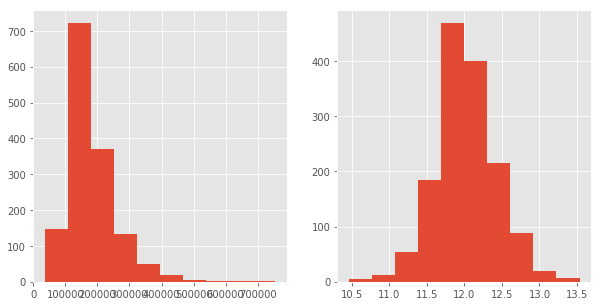

In [76]:
# 價格分布
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(10,5))
axis1.hist(train_Y)
# 對skew的資料點作log轉換
train_Y = np.log1p(train_Y)
axis2.hist(train_Y)

In [77]:
save_train = train_X.copy()
save_test = test_X.copy()
save_train['Id'] = train_Id
save_test['Id'] = test_Id
save_test['HouseAge-sq'].fillna(0, inplace=True)

display(save_train.head())
display(save_test.head())

# save_train.to_csv("data/new_train.csv", index=False)
# save_test.to_csv("data/new_test.csv", index=False)

print('Done.')

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,ExterGrade_GdGd,ExterGrade_GdGdGd,ExterGrade_GdGdGdGd,ExterGrade_Po,ExterGrade_PoPo,ExterGrade_TA,ExterGrade_TATA,ExterGrade_TATATA,ExterGrade_TATATATA,Id
0,60,0.625000,0.405761,0.875,0.625,0.998007,0.998007,0.353963,0.440935,0.0,...,0,0,0,0,0,0,0,1,0,1.0
1,20,0.769231,0.450153,0.750,1.000,0.984554,0.984554,0.000000,0.569657,0.0,...,0,0,0,0,0,0,1,0,0,2.0
2,60,0.653846,0.510589,0.875,0.625,0.997010,0.997509,0.300867,0.323152,0.0,...,0,0,0,0,0,0,0,1,0,3.0
3,70,0.576923,0.448263,0.875,0.625,0.954160,0.981565,0.000000,0.156615,0.0,...,0,0,0,0,0,0,1,0,0,4.0
4,60,0.807692,0.612228,1.000,0.625,0.996512,0.996512,0.564402,0.414840,0.0,...,0,0,0,0,0,0,0,1,0,5.0


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,ExterGrade_GdGd,ExterGrade_GdGdGd,ExterGrade_GdGdGdGd,ExterGrade_Po,ExterGrade_PoPo,ExterGrade_TA,ExterGrade_TATA,ExterGrade_TATATA,ExterGrade_TATATATA,Id
1452,20,0.769231,0.523724,0.625,0.750,0.977080,0.977080,0.000000,0.312872,0.286817,...,0,0,0,0,0,0,1,0,0,2913.0
1453,20,0.778846,0.612453,0.750,0.750,0.975585,0.975585,0.210277,0.544931,0.000000,...,0,0,0,0,0,0,1,0,0,2914.0
1454,60,0.711538,0.598325,0.625,0.625,0.995017,0.995516,0.000000,0.482969,0.000000,...,0,0,0,0,0,0,1,0,0,2915.0
1455,60,0.750000,0.464324,0.750,0.750,0.995516,0.995516,0.042424,0.386980,0.000000,...,0,0,0,0,0,0,1,0,0,2916.0
1456,120,0.413462,0.259604,1.000,0.625,0.992526,0.992526,0.000000,0.187671,0.000000,...,0,0,0,0,0,0,0,1,0,2917.0


Done.


In [78]:
train_x = save_train.drop(['Id'], axis=1)
train_y = train_Y
test_x = save_test.drop(['Id'], axis=1)

In [79]:
train_x.shape

(1452, 424)

## Modeling

In [80]:
import tensorflow as tf

### hyper parameters

In [135]:
# hyperparameters
initial_learning_rate = 0.001   
global_step = tf.Variable(0, trainable=False)
learning_rate = tf.train.exponential_decay(initial_learning_rate,
                                           global_step=global_step,
                                           decay_steps=5,decay_rate=0.9)

training_iters = 100     # train step 上限
batch_size = 128            
n_steps = 424
n_inputs = 1               # MNIST data input (img shape: 28*28)                # time steps       # neurons in hidden layer
n_output = 1              # MNIST classes (0-9 digits)
_dropout_rate = 0.2
n_hidden_units = 128 
n_layers = 5
n_batch =1459 // batch_size

### helper functions

In [136]:
def get_RNN(rnn_size, dropout_rate):
    BasicRNN_layer = tf.contrib.rnn.BasicRNNCell(rnn_size)
    RNN_layer = tf.contrib.rnn.DropoutWrapper(BasicRNN_layer, output_keep_prob=1-dropout_rate)
    return RNN_layer

def RNN_cell(rnn_size, X, number_of_layers, dropout_rate):
    cell = tf.contrib.rnn.MultiRNNCell([get_RNN(rnn_size, dropout_rate) for _ in range(number_of_layers)])
    init_state = cell.zero_state(tf.shape(X)[0], tf.float32)
    return cell, init_state

#### Define computing graph

In [138]:
main_graph = tf.Graph()
sess = tf.Session(graph=main_graph)

In [139]:
with main_graph.as_default():
    with tf.name_scope('inputs'):
        input_data = tf.placeholder(dtype=tf.float32, shape=[None, n_steps, n_inputs], name='input_data')
        y_true = tf.placeholder(dtype=tf.float32, shape=[None, n_output], name='y_true')
        dropout_rate = tf.placeholder(dtype=tf.float32, shape=[], name='dropout_rate')
    
    with tf.name_scope('RNN_layer'):
        cell, init_state = RNN_cell(n_hidden_units, input_data, n_layers, dropout_rate)
        outputs, state = tf.nn.dynamic_rnn(cell, input_data, initial_state=init_state)
        
    with tf.name_scope('output_layer'):
        RNN_last_outputs = outputs[:,-1:]
        prediction = tf.layers.dense(inputs=RNN_last_outputs, units=n_output)
        
    with tf.name_scope('loss'):
        loss = tf.reduce_mean(tf.square(prediction - y_true))
        
    with tf.name_scope('optimizer'):
        optimizer = tf.train.AdamOptimizer(learning_rate=lr)
        training_op = optimizer.minimize(loss)
        
    init = tf.global_variables_initializer()
    
sess.run(init)

In [140]:
for epoch_index in range(training_iters):
    
    for batch in range(n_batch):
        X = train_x.iloc[batch:batch+batch_size].values.reshape((-1, n_steps, n_inputs))
        y = train_y.iloc[batch:batch+batch_size].values.reshape((-1, n_output))
        sess.run(training_op, feed_dict={input_data:X, y_true:y, dropout_rate:_dropout_rate})
        
    if epoch_index % 5 == 0:
        _loss = sess.run(loss, feed_dict={input_data:X, y_true:y, dropout_rate:_dropout_rate})
        print('Epoch ', epoch_index)
        print(' Loss', _loss)
        print('_______________________________')

Epoch  0
 Loss 273.0038
_______________________________
Epoch  5
 Loss 0.8482293
_______________________________
Epoch  10
 Loss 0.64003253
_______________________________
Epoch  15
 Loss 0.59263515
_______________________________
Epoch  20
 Loss 0.81422704
_______________________________
Epoch  25
 Loss 0.5888448
_______________________________
Epoch  30
 Loss 0.6578777
_______________________________
Epoch  35
 Loss 0.613549
_______________________________
Epoch  40
 Loss 0.64438814
_______________________________
Epoch  45
 Loss 0.6216153
_______________________________
Epoch  50
 Loss 0.5767918
_______________________________
Epoch  55
 Loss 0.5640752
_______________________________
Epoch  60
 Loss 0.66614974
_______________________________
Epoch  65
 Loss 0.5538113
_______________________________
Epoch  70
 Loss 0.5930455
_______________________________
Epoch  75
 Loss 0.51659733
_______________________________
Epoch  80
 Loss 0.6689675
_______________________________
Epoch  85
 L

** 預測結果繳交 **

In [141]:
y_pred = np.expm1(sess.run(prediction, feed_dict={input_data:_test_x_reshape, dropout_rate:_dropout_rate}).reshape((-1,)))
testid = pd.read_csv('data/test.csv')['Id']
result = pd.DataFrame({'Id':testid,'SalePrice':y_pred})
result.to_csv('submissions/rnn_pred_3.csv',index=False)

<img src='images/v2.jpg'>